###HEART FAILURE PREDICTION 

###Questions
-> Perform the necessary analysis on the given dataset and pick any three suitable models for the prediction of heart failure.

-> Plot the confusion matrix of all these models.

-> Plot a graph to study the accuracy and f1_score of these models and then choose the best model.

-> Explain in the brief why you have chosen this model.

-> Choose any three examples to show the accracy of the predictions of your model



In [183]:
#Importing Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.feature_selection import RFE

###Loading and Understanding dataset 

In [184]:
heart_data= pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [185]:
#First Five Rows
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [186]:
#Last Five Row
heart_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [187]:
heart_data.shape

(299, 13)

In [188]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [189]:
#statistical information
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###Analysis

In [190]:
#checking how many males and how many females
males= sum(heart_data['sex']==1)
males

194



#Missing Values

In [191]:
heart_data.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

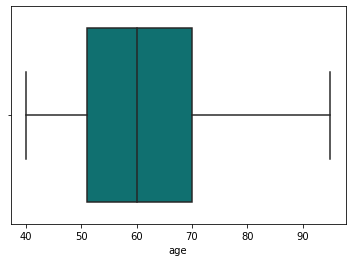

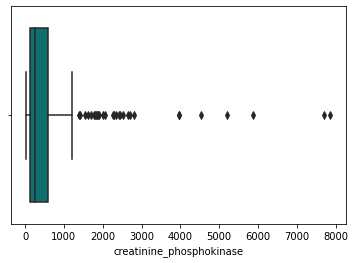

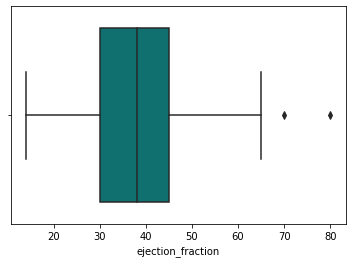

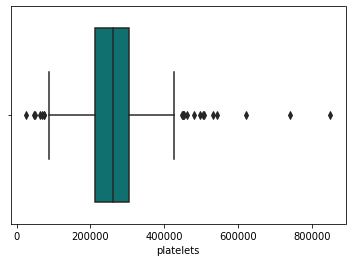

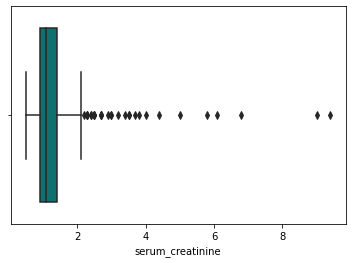

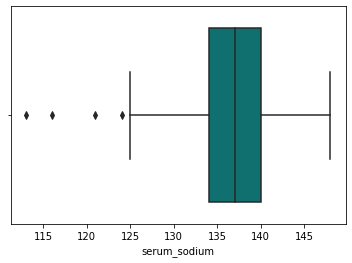

In [192]:
#checking if there are outliers in the features

#Boxplot for age
sns.boxplot(x=heart_data.age, color= 'teal')
plt.show()

#Boxplot for create_phosphokinase
sns.boxplot(x=heart_data.creatinine_phosphokinase, color= 'teal')
plt.show()

#Boxplot for ejection_fraction
sns.boxplot(x=heart_data.ejection_fraction, color= 'teal')
plt.show()

#Botplot for platelate
sns.boxplot(x=heart_data.platelets, color= 'teal')
plt.show()

#Boxplot for serum_createinine
sns.boxplot(x=heart_data.serum_creatinine, color= 'teal')
plt.show()

#Boxplot for serum_sodium
sns.boxplot(x=heart_data.serum_sodium, color= 'teal')
plt.show()



###---->No Outliers

###Correlation Matrix for each feature

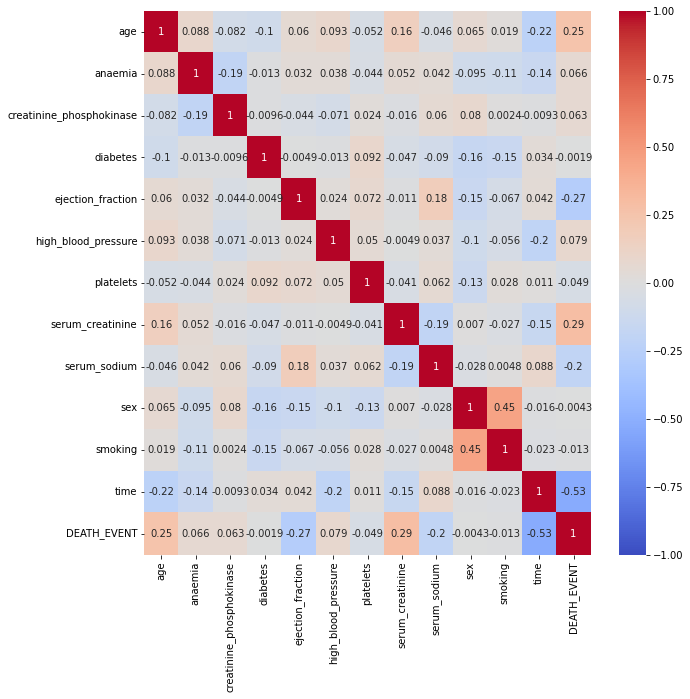

In [193]:
import seaborn as sns
plt.figure(figsize= (10, 10))   #heart_data[top_corr_features].
g=sns.heatmap(heart_data.corr(),vmin=-1, annot=True,  cmap='coolwarm');

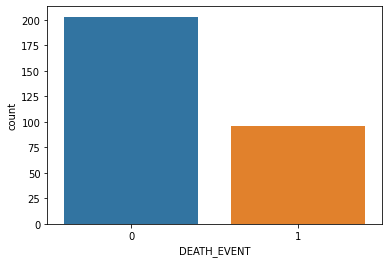

In [194]:
heart_data['DEATH_EVENT'].value_counts()
sns.countplot(x=heart_data['DEATH_EVENT'])

In [195]:
fig= px.histogram(heart_data, "age", color='DEATH_EVENT', nbins=50, 
                  title="Patients age distribution")
fig.show()

In [196]:
fig= px.box(heart_data, x="DEATH_EVENT", y="age", points="all"
             ,title="Age & DEATH_EVENT box plot")
fig.show()

In [197]:
fig= px.box(heart_data, x="DEATH_EVENT", y="ejection_fraction", points="all"
             ,title="Ejection_fraction & DEATH_EVENT box plot")
fig.show()

In [198]:
fig= px.box(heart_data, x="DEATH_EVENT", y="serum_creatinine", points="all"
             ,title="Serum_creatinine & DEATH_EVENT box plot")
fig.show()

In [199]:
ds= heart_data["high_blood_pressure"].value_counts().reset_index()
ds.columns= ['high_blood_pressure', 'count']
fig= px.pie(
    ds, values= "count",
    names="high_blood_pressure",
    title="High blood pressure bar chart"
)
fig.show()

###Data Modeling

Main Features: time, ejection_fraction, serum_createinine

In [349]:
heart_data['DEATH_EVENT'].value_counts()  

0    203
1     96
Name: DEATH_EVENT, dtype: int64

1--> heart failure and  0--> No heart failure

In [350]:
x= heart_data.drop('DEATH_EVENT', axis=1)
y=heart_data['DEATH_EVENT']  # target variable

In [351]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [352]:
# Spliting the features and target variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, 
                  y, test_size= 0.2 , stratify= y, random_state=2)

In [353]:
print(x.shape, x_train.shape, x_test.shape);

(299, 12) (239, 12) (60, 12)


###1-Logistic Regression Model

In [354]:
from sklearn.linear_model import LogisticRegression
LogisticModel= LogisticRegression()
Logistic_Model= LogisticModel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###2-Random forest classifier

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [358]:
randomForestModel=RandomForestClassifier(max_depth=2, random_state=0)
randomModel= randomForestModel.fit(x_train, y_train)

###3-Decision Tree Classifier

In [269]:
from sklearn.tree import DecisionTreeClassifier

In [359]:
Decision_model= DecisionTreeClassifier()
DecisionModel=Decision_model.fit(x_train, y_train)



###Qestion: Model Evaluation-->Accuracy and f1_score



Logistic Regression Model


In [363]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [364]:
#Accuracy on training data
#accuracy_list= []
train_model_pred1= Logistic_Model.predict(x_train)
model_accuracy= accuracy_score(train_model_pred1, y_train)
model_accuracy
#accuracy_list.append(100*model_accuracy)

0.8326359832635983

In [ ]:
#Accuracy on test data
test_model_pred1= model.predict(x_test)
model_accuracy= accuracy_score(test_model_pred1, y_test)
model_accuracy

In [365]:
f1_score(y_test, test_model_pred1)

0.6470588235294117

Random Forest Model


In [369]:
#accuracy on training data 
train_model_pred2= randomModel.predict(x_train)
model_accuracy= accuracy_score(train_model_pred2, y_train)
model_accuracy

0.8577405857740585

In [366]:
#Accuracy on the test dataset 

test_model_pred2= randomModel.predict(x_test)
model_accuracy= accuracy_score(test_model_pred2, y_test)
model_accuracy

0.8166666666666667

In [367]:
f1_score(y_test, test_model_pred2)

0.6206896551724138

Decision Tree Model

In [370]:
#Accuracy on the train dataset 
train_model_pred3= DecisionModel.predict(x_train)
model_accuracy= accuracy_score(train_model_pred3, y_train)
model_accuracy


1.0

In [371]:
#Accuracy on the test dataset 
test_model_pred3= DecisionModel.predict(x_test)
model_accuracy= accuracy_score(test_model_pred3, y_test)
model_accuracy

0.85

In [372]:
f1_score(y_test, test_model_pred3)

0.7567567567567567

Final Model accuracies

In [373]:
final_data= pd.DataFrame({"Models" : ['LogisticRegressionModel', 'RandomForestModel', 'DecisionTreeModel'], 
        'ACC': [accuracy_score(test_model_pred1, y_test), 
                accuracy_score(test_model_pred2, y_test), 
                accuracy_score(test_model_pred3, y_test)]})

In [374]:
final_data

,Models,ACC
0,LogisticRegressionModel,0.800000
1,RandomForestModel,0.816667
2,DecisionTreeModel,0.850000


#Qestion:  Confusion Matrix on Every Model

Logistice Regression Confusion matrix


<Figure size 432x288 with 0 Axes>

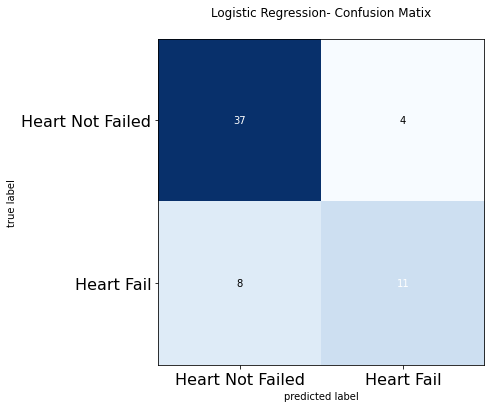

In [360]:
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(y_test, test_model_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize=(10, 6), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression- Confusion Matix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=16)
plt.show()

Random forest confusion matrix

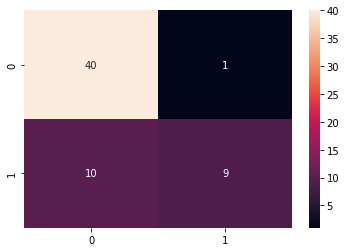

In [361]:
cm = confusion_matrix(y_test, test_model_pred2)
sns.heatmap(cm, annot=True)

Decision Tree Confusion matrix

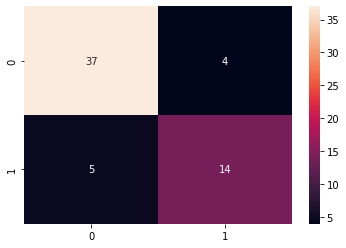

In [362]:
cm = confusion_matrix(y_test, test_model_pred3)
sns.heatmap(cm, annot=True)



###Qestion: Explain in the brief why you have chosen this model.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



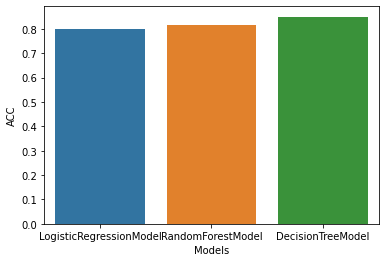

In [375]:
import seaborn as sns
sns.barplot(final_data['Models'], final_data['ACC'])

From above on comparing the accuracies , it is clear that DecisionTree model is best as it is given more accuray than the other and it has hightes f1_score score.

###Question: Choose any three examples to show the accracy of the predictions of your model


In [329]:
import pandas as pd 

In [342]:
new_data= ({
    'age':  [65,55,65],
    'anaemia': [1, 1, 1], 
    'creatinine_phosphokinase': [52, 146, 160], 
    'diabetes': [0, 0, 1 ], 
    'ejection_fraction': [25, 20, 10], 
    'high_blood_pressure': [1, 1, 0 ] , 
    'platelets': [276000, 265000, 210000], 
    'serum_creatinine': [1.3, 1.9, 1.2 ], 
    'serum_sodium':  [137, 129, 137] , 
    'sex': [0, 1, 0], 
    'smoking': [0, 0, 1], 
    'time':[16, 7, 3] 
    #'DEATH_EVENT': [1, 0, 1], 
})

In [344]:
new_data= pd.DataFrame(new_data)
new_data   

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,65,1,52,0,25,1,276000,1.3,137,0,0,16
1,55,1,146,0,20,1,265000,1.9,129,1,0,7
2,65,1,160,1,10,0,210000,1.2,137,0,1,3


In [347]:
prediction= DecisionModel.predict(new_data)
for i in range(3):
  if prediction[i]==0: 
    print('No Heart Failure');
  else:
    print('Heart Failure');


No Heart Failure
Heart Failure
Heart Failure
